# Tree Kernel

In [1]:
from nltk.tree import Tree
import numpy as np
tree = Tree.fromstring('( NN-textualorganization ( EDU 1 )  ( SN-purpose ( NS-elaboration ( EDU 2 )  ( NS-temporal ( EDU 3 )  ( EDU 4 )  )  )  ( NS-elaboration ( NS-elaboration ( EDU 5 )  ( EDU 6 )  )  ( EDU 7 )  )  )  )')

### prune tree

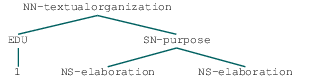

In [73]:
def prune_aux(tree,cut,i):
    if(type(tree)==str and cut>i):
        return '('+tree+')'
    try:
        if(cut>i):
            return '('+tree.label()+'\n\t'+prune_aux(tree[0],cut,i+1)+prune_aux(tree[1],cut,i+1)+')'
        else:
            return ''
    except:
        return '('+tree.label()+'\n\t'+prune_aux(tree[0],cut,i+1)+')'

def prune(tree,max_height=10):
    s = prune_aux(tree,max_height,0)
    return Tree.fromstring(s)

prune(tree,3)

In [3]:
def clean_tree(tree):
    """Returns a tree without any digits"""
    strtree=str(tree)
    match=re.findall(r'[^0-9]+',str(strtree))
    strtree=''.join(match)
    return Tree.fromstring(strtree)

def TreeKernel(T1,T2,const=1,rho=1):
    '''returns the number of common subset tree if rho=1 and common 
        subtrees if rho=0.
        const balances the contribution of subtrees: small values
        decay the contribution of lower nodes in large subtrees.'''
    K=0
    for t1 in T1.subtrees():
        for t2 in T2.subtrees():
            K+=delta(t1,t2,const,rho)
    return K


def same_root(T1,T2):
    '''returns true only if the label of the root nodes are the same.'''
    return T1.label()==T2.label()

def pre(T):
    '''returns true only if root of T is a preterminal node.'''
    return T.height()<=2

def delta(T1,T2,const=1,rho=1):
    '''returns the number of common subset trees if rho=1 and common 
        subtrees if rho=0 containing their root.
        const balances the contribution of subtrees: small values
        decay the contribution of lower nodes in large subtrees.'''
    if not same_root(T1,T2):
        return 0
    if(pre(T1) and pre(T2) and T1==T2):
        return const
    if(not(pre(T1)) and not(pre(T2)) and same_root(T1,T2)):
        return const*(rho+delta(T1[0],T2[0]))*(rho+delta(T1[1],T2[1]))
    return 1


print delta(tree,tree)
print TreeKernel(tree,tree,rho=1)

244
452


## Random Tree Generator

In [4]:
def g_aux(labels,depth,s):
    if(depth==0):
        return ''
    if(np.random.rand(1)[0]<0.6):
        label1,label2=np.random.choice(labels,2)
        str1='( '+label1+' '+g_aux(labels,depth-1,s)+' )'
        str2='( '+label2+' '+g_aux(labels,depth-1,s)+' )'
        return str1+str2
    if(np.random.rand(1)[0]<0.5):
        label=np.random.choice(labels)
        return '('+label+' '+g_aux(labels,depth-1,s)+' )'
    if(np.random.rand(1)[0]<0.6):
        return g_aux(labels,depth-1,s)
    else:
        return ''
    
def gen_rand_tree(labels=['A','B'],maxdepth=4):
    label=np.random.choice(labels)
    return Tree.fromstring('( '+label+' '+g_aux(labels,maxdepth,'')+' )')

def gen_rand_tree_list(ntrees=10,labels=['A','B'],maxdepth=4):
    k=0
    list_tree=[]
    min_nodes=3
    while(k<ntrees):
        t=gen_rand_tree(labels,maxdepth)        
        if(len(str(t))>=4*min_nodes): #test if tree has more that min_nodes
            list_tree.append(t)
            k+=1
    return list_tree

In [7]:
print gen_rand_tree(maxdepth=4)

(A (A (A ) (B (B (B ) (B )))) (A (B (B (B )) (B (A ) (A )))))


In [27]:
l = [(t.height(),t.label()) for i,t in enumerate(tree.subtrees()) if(t.label() != 'EDU')]
print l
print ''
l = [(i,v[3:]) for i,v in l]
print l

[(6, 'NN-textualorganization'), (5, 'SN-purpose'), (4, 'NS-elaboration'), (3, 'NS-temporal'), (4, 'NS-elaboration'), (3, 'NS-elaboration')]

[(6, 'textualorganization'), (5, 'purpose'), (4, 'elaboration'), (3, 'temporal'), (4, 'elaboration'), (3, 'elaboration')]


# Classification
## Classe abstraite

### SVM
#### linear

In [8]:
from sklearn import svm
clf = svm.LinearSVC()
#clf.fit(X,y)

#### with rbf kernel

In [ ]:
clf = svm.SVC(kernel=kernels.rbf_kernel)
#clf.fit(X,y)

### KNN

In [10]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
#clf.fit(X,y)

### MaxEnt

In [11]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
#clf.fit(X,y)

### Random Forest

In [12]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier()
#clf.fit(X,y)

## Scores: Récapitulatif

In [4]:
import pandas as pd
data=[]
results=[]

d={}



#bayes=models.Bayes()
#d['Naive Bayes']=models.cross_validation(bayes,x,y2,8)


print(data)
results.append(d)    

df=pd.DataFrame(results) #index=dataset
df.to_csv("results1.csv")

[]
